# Pymaceuticals Inc.
---

### Analysis

<span style="color.black">Tumor volume and weight are highly correlated for Capomulin and Ramicane with r values 0.84 and 0.81 respectively, while for Infubinol and Ceftamin weight and tumor does not seem to bear any relationship.
    
Mean tumor size in mm3 for Capomulin and Ramicine is around 40 with standard error at around 0.32 while for the rest of treatments it ranges between 52 to 55 with standard error more than 0.46.
    
From the analysis Capomulin and Ramicine results in around 20% reduction in tumor volume from the start to the end of study. We need further testing and analysis to establish the statistical significance of difference between Capomulin and Ramicine in average tumor reduction.</span>

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_results.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1461,a520,30,36.947710,1
605,w167,10,51.826410,0
1035,m133,20,52.636882,1
489,u946,10,46.730506,1
575,v719,10,51.497054,1


In [5]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how= 'outer')

# Display the data table for preview
combined_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [7]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].nunique()
mice_count

249

In [9]:
# Showing duplicate rows 
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])==True]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])==True]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~(combined_data['Mouse ID'] == 'g989')]
clean_data.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1840,l897,25,45.354679,0,Capomulin,Male,17,19
1540,r107,30,58.406473,1,Propriva,Female,2,28
412,r701,20,54.114137,0,Naftisol,Male,21,25
383,m650,10,50.968998,1,Ketapril,Male,15,27
131,n304,30,55.039020,3,Naftisol,Male,9,26


In [13]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_data['Mouse ID'].nunique()
mice_count_clean

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_table = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
summary_table = summary_table.rename(columns= {'var': 'Variance','std':'Std Dev','sem':'Std Err'}) 
summary_table = summary_table.rename(columns = lambda x: x.title() + ' Tumor Volume')
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,Std Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

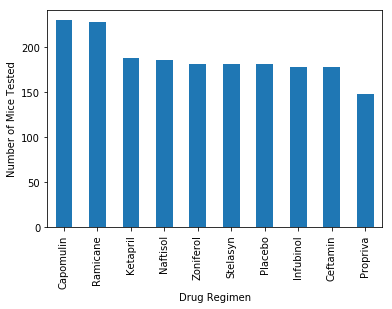

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_timepoints_count = clean_data.groupby('Drug Regimen')['Timepoint'].count()
regimen_timepoints_count = regimen_timepoints_count.sort_values(ascending= False)
regimen_timepoints_count.plot(kind='bar')
plt.ylabel('Number of Mice Tested')
plt.show()

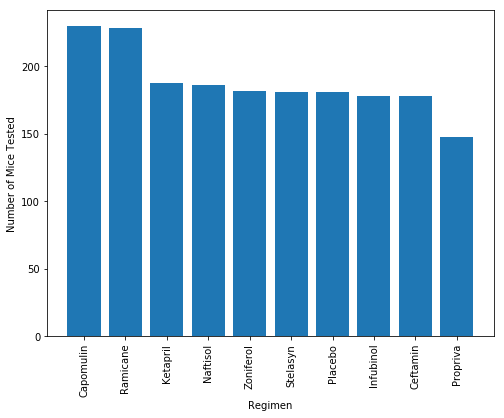

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# creating a list of x values with number of values equal to number of regimens
x = list(range(len(regimen_timepoints_count.index)))
plt.figure(figsize=(8,6))
plt.bar(x, regimen_timepoints_count)

# labelling x and y axes
plt.xlabel('Regimen')
plt.ylabel('Number of Mice Tested')

#labelling xticks with regimen labels
plt.xticks(x, regimen_timepoints_count.index , rotation = 90)
plt.show()

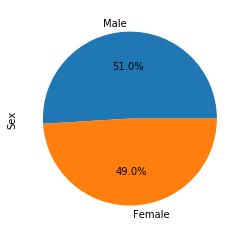

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# creating a series with index names as Sex values and column name as Sex
gender_count = clean_data.groupby('Sex')['Mouse ID'].count()
gender_count = gender_count.sort_values(ascending= False).rename('Sex')
gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.show()

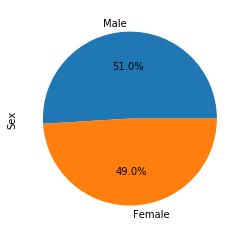

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count, labels= gender_count.index, autopct= '%1.1f%%')
plt.ylabel('Sex')
plt.show()

There are 49% female mice and 51% male mice in the study group

## Quartiles, Outliers and Boxplots

In [20]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 

final_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()
final_timepoint = final_timepoint.reset_index()
final_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
# Merge this grouped DataFrame with the original cleaned DataFrame.
final_tumor = pd.merge(final_timepoint, clean_data, how='left', on=('Mouse ID','Timepoint'))
final_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Alternatively we can extract the index of  maximum Timepoint value for each mouse using idxmax function and using loc to 
# return the dataframe containing these indices

final_tumor_1 = clean_data.loc[clean_data.groupby('Mouse ID')['Timepoint'].idxmax()]
final_tumor_1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1134,a262,45,70.717621,4,Placebo,Female,17,29
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
736,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1566,z435,10,48.710661,0,Propriva,Female,12,26
646,z578,45,30.638696,0,Ramicane,Male,11,16
279,z581,45,62.754451,3,Infubinol,Female,24,25
683,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
final_tumor['Drug Regimen'].value_counts()

Placebo      25
Capomulin    25
Ceftamin     25
Ramicane     25
Infubinol    25
Naftisol     25
Ketapril     25
Zoniferol    25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# creating a dict using dict comprehension with key value pairs as regimen name and final tumor values for each regimen in the treatment list
tumor_treatment = {treatment: final_tumor[final_tumor['Drug Regimen']==treatment]['Tumor Volume (mm3)'] for treatment in treatment_list}

In [25]:
# creating a dict for IQR , lower and upperbound for each of these 4 regimens 
iqr_treatment =  {treatment: stats.iqr(tumor_treatment[treatment]) for treatment in treatment_list}
iqr_treatment

# 25th percentile
percentile_25_treatment = {treatment: np.percentile(tumor_treatment[treatment], 25) for treatment in treatment_list}

# 75th percentile
percentile_75_treatment = {treatment: np.percentile(tumor_treatment[treatment], 75) for treatment in treatment_list}

# Lowerbound
lowerbound_treatment = {treatment: percentile_25_treatment[treatment] - 1.5*iqr_treatment[treatment] for treatment in treatment_list}

# Upperbound
upperbound_treatment = {treatment: percentile_75_treatment[treatment] + 1.5*iqr_treatment[treatment] for treatment in treatment_list}

print(iqr_treatment)
print(lowerbound_treatment)
print(upperbound_treatment)

{'Capomulin': 7.781863460000004, 'Ramicane': 9.098536719999998, 'Infubinol': 11.477135160000003, 'Ceftamin': 15.577752179999997}
{'Capomulin': 20.70456164999999, 'Ramicane': 17.912664470000003, 'Infubinol': 36.83290494999999, 'Ceftamin': 25.355449580000002}
{'Capomulin': 51.83201549, 'Ramicane': 54.30681135, 'Infubinol': 82.74144559000001, 'Ceftamin': 87.66645829999999}


In [26]:
# Determine outliers using upper and lower bounds

# creating a dict for calculating potential outlier for each of treatment regimen list
outliers_treatment = {treatment: tumor_treatment[treatment][(tumor_treatment[treatment] < lowerbound_treatment[treatment])|
                                                            (tumor_treatment[treatment] > upperbound_treatment[treatment])] 
                      for treatment in treatment_list}

outliers_treatment

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

There is only one outlier in the treatment list for Drug Infubinol

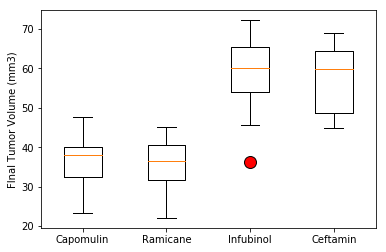

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(list(tumor_treatment.values()), labels= list(tumor_treatment.keys()), flierprops={'markersize': 12,'markerfacecolor': 'red'})
plt.ylabel("FInal Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

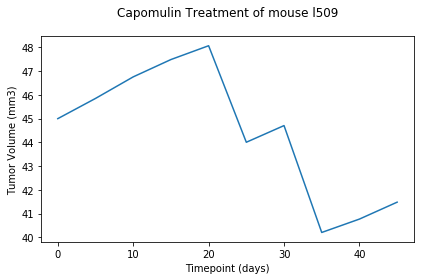

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

data_l509 = clean_data[clean_data['Mouse ID']=='l509']
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(data_l509['Timepoint'], data_l509['Tumor Volume (mm3)'])
ax.set_title('Capomulin Treatment of mouse l509', pad = 20 )
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

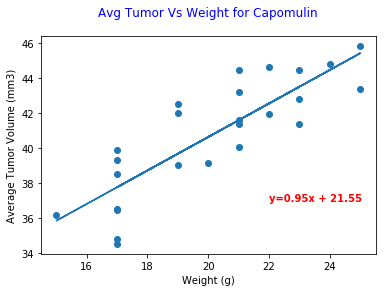

 The correlation between mouse weight and tumor size for Capomulin is 0.84


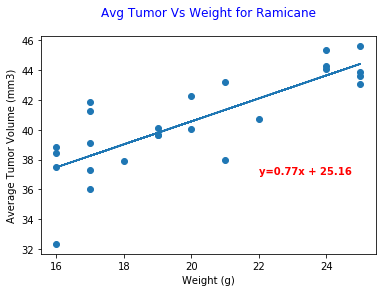

 The correlation between mouse weight and tumor size for Ramicane is 0.81


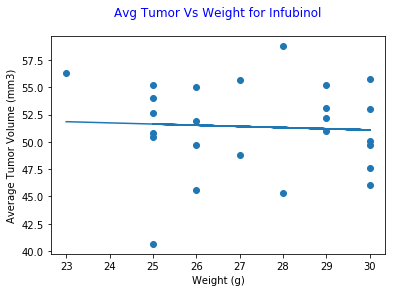

 The correlation between mouse weight and tumor size for Infubinol is -0.06


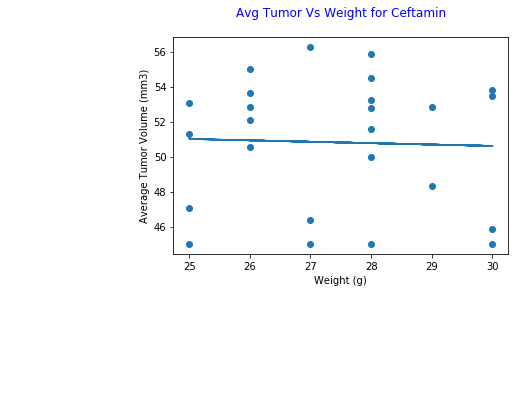

 The correlation between mouse weight and tumor size for Ceftamin is -0.04


In [29]:
# defining the function to create a scatter plot and regression line for avg tumor value and weight of mouse for a drug. We can 
# then draw a plot for any drug by calling the function

def scatter_regline_plot(treatment, df):
    final = df[df['Drug Regimen']== treatment].groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean','Weight (g)': 'max'})
    weight = final['Weight (g)']
    tumor_obs = final['Tumor Volume (mm3)']
    
    #plotting scatter plot of weights and tumor size
    plt.scatter(weight, tumor_obs)
    plt.title(f"Avg Tumor Vs Weight for {treatment}", pad = 20, fontsize= 12 , color= 'blue')
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)') 
    
    # regressing tumor on weight    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x= weight, y= tumor_obs)
    tumor_pred = slope * weight + intercept
    
    #adding regression line to the plot
    plt.plot(weight, tumor_pred)
    plt.annotate(f'y={round(slope,2)}x + {round(intercept,2)}', xy=(22,37), weight= 'bold', color='red' )
    plt.show()
    
    print(f" The correlation between mouse weight and tumor size for {treatment} is {round(r_value, 2)}")
    
for treatment in treatment_list:    
    scatter_regline_plot(treatment, clean_data)

In [30]:
# Sorting the data on treatment, Mouse ID and Timepoint
clean_data_sorted = clean_data.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'])

# Creating a function to calculate average tumor change for each treatment

def avg_tumor_change(treatment):
    mouse_id_grouped = clean_data_sorted[clean_data_sorted['Drug Regimen']== treatment].groupby('Mouse ID')
    # calculating the percentage difference between last tumor value and first tumor value for each mouse for a particular treatment
    tumor_change = mouse_id_grouped['Tumor Volume (mm3)'].agg(lambda x : (x.iloc[-1] -x.iloc[0])/x.iloc[0] *100)
    # Average percent tumor change for all the mice in a particular treatment
    avg_change = round(tumor_change.mean(), 2)
    return avg_change

for treatment in treatment_list:
    print(f' Average tumor change for all mice getting {treatment} treatment is {avg_tumor_change(treatment)}')

 Average tumor change for all mice getting Capomulin treatment is -18.52
 Average tumor change for all mice getting Ramicane treatment is -19.57
 Average tumor change for all mice getting Infubinol treatment is 29.28
 Average tumor change for all mice getting Ceftamin treatment is 28.34
